# 第1章章末問題 回答

## 問題1.1
・Aさんは「絶対に1しか出ない」→常に1にかけ続ける→常に1/6の確率

・Bさんは「均等に1/6の確率だよ」→これまで1,2,3,4,5ばっかり出ているから次は6が出るかもしれない…　

・Bさんは過去のデータに左右されて次の目を選ぶので実は1/6以下の確率になっている？

→勝つのはAさん？　　

### Pythonの練習も兼ねてコードを書いて検証してみる
#### ギャンブルのルール
・サイコロは1~6の目がランダムに出る

・目を当てた場合→掛け金の6倍の賞金を獲得

・目を外した場合→掛け金を失う

#### AさんとBさんのアルゴリズム
・Aさんは1だけを狙い居続ける

・Bさんは出目の出現した回数が最も小さい出目を狙う

・Bさんは出現回数が最小の出目が複数あるときはより小さい出目を狙う(例：3と５だった場合は３)


10回目時点での出目の確率は左から1,2,3,4,5,6で[0.  0.2 0.2 0.  0.3 0.3]
10回目時点での獲得賞金は左からAさん, Bさんで[-1000 -1000]
100回目時点での出目の確率は左から1,2,3,4,5,6で[0.16 0.22 0.15 0.16 0.16 0.15]
100回目時点での獲得賞金は左からAさん, Bさんで[1200 3300]
1000回目時点での出目の確率は左から1,2,3,4,5,6で[0.155 0.163 0.185 0.164 0.175 0.158]
1000回目時点での獲得賞金は左からAさん, Bさんで[ 8500 21100]
10000回目時点での出目の確率は左から1,2,3,4,5,6で[0.1617 0.1692 0.1672 0.1704 0.1702 0.1613]
10000回目時点での獲得賞金は左からAさん, Bさんで[131900 143800]


Text(0.5, 1.0, 'n=10000')

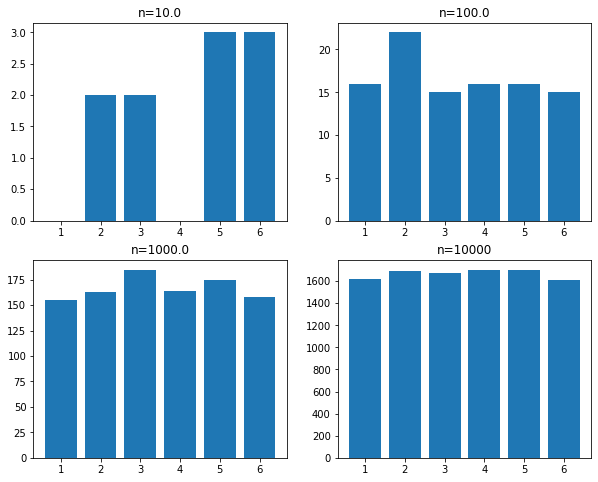

In [119]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

dice_count = [0,0,0,0,0,0] #出目1~6のカウンタ

A_money = B_money = 0 #AとBの獲得賞金初期化
A_choice = 1;                     #Aの狙う出目(固定)
B_choice = 1;                     #Bの狙う出目(初期値)

n = 10000                          #ギャンブルの回数
m = 100                             #掛け金
r = 6                                   #倍率

height = [0,0,0,0]            #グラフの縦軸配列
x = 0                                   #グラフの縦軸インクリメント用変数

for i in range(n):
    A = random.randint(1, 6)
    if A == 1:
        dice_count[0] += 1
    elif A == 2:
        dice_count[1] += 1
    elif A == 3:
        dice_count[2] += 1
    elif A == 4:
        dice_count[3] += 1
    elif A == 5:
        dice_count[4] += 1
    elif A == 6:
        dice_count[5] += 1
        
    if A == A_choice and A==B_choice: 
        A_money += (m*r)
        B_money += (m*r)
    
    elif A == A_choice:
        A_money += (m*r)
        B_money += -m
        
    elif A == B_choice:
        A_money += -m
        B_money += (m*r)
        
    else:
        A_money += -m
        B_money += -m
        pass
     
    min_dice = np.argmin(dice_count)+1
   #print("出目は"+str(A)+"出た回数が最小の出目は"+str(min_dice))
    
    if not B_choice == min_dice:
        B_choice = min_dice
    #print("Bさんが次に狙うのは"+str(B_choice))
    
    if i == (n/1000)-1 or i == (n/100)-1 or i == (n/10)-1 or i==n-1:
        left = np.array([1,2,3,4,5,6])
        height[x] = np.array(dice_count)
        rate = height[x]/(i+1)
        print(str(i+1) +"回目時点での出目の確率は左から1,2,3,4,5,6で"+ str(rate))
        total_money = np.array([A_money, B_money])
        print(str(i+1) +"回目時点での獲得賞金は左からAさん, Bさんで"+str(total_money))
        x += 1

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
axes[0,0].bar(left, height[0], linewidth=2)
axes[0,0].set_title("n="+str(n/1000))
axes[0,1].bar(left, height[1], linewidth=2)
axes[0,1].set_title("n="+str(n/100))
axes[1,0].bar(left, height[2], linewidth=2)
axes[1,0].set_title("n="+str(n/10))
axes[1,1].bar(left, height[3], linewidth=2)
axes[1,1].set_title("n="+str(n))


### コードを書いて見た結果
・当然だけど試行回数が増すごとに各目の確率は1/6へと収束する

・コードを実行し直すたびに最終的なAさんとBさんの獲得賞金は変化する

**20回コードを実行してみたところ、Aさん11勝、Bさん8勝、引き分け１回**

・Aさんの獲得賞金は600＊(10000/6)-100＊(10000＊5/6)=1000200-833300=166900円の周辺に収束するはず
→だいたいそんなもんだった

・Bさんの獲得賞金は振れ幅が結構ある。２０回コードを実行し直した中では下は8500円から上は220000円まで

### 考察
・試行回数が増えれば出目の確率は均等に近づくので、一定の賞金がほしければAさんの賭け方が適していそう

・一方で試行回数が少ない間は出ていない目を狙っていくほうが最終的な賞金をより手に入れることができるかもしれない

### 感想
・２０回分くらいしかコードを回していないのでもっと回数こなせば違う結果になるかもしれない

・そういうコードを書きたかったが時間がなかった・・・

・Pythonで初めてちゃんとしたコードを書いたがCと違うところで戸惑うことが多かった。ポインタとかPythonではどう使うのかよくわからん

・グラフをすぐに出力できるのは便利
